In [1]:
import pandas as pd
import os
from dbfread import DBF
import numpy as np

import math

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

from sklearn.datasets import load_breast_cancer, make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV

from sklearn import metrics 
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

import seaborn as sns

In [2]:
#Importo los datos

data_general = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_100_DISCAPACIDAD.dbf', load=True, encoding='latin-1'))
data_discapacidad = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_200_DISCAPACIDAD.dbf', load=True, encoding='latin-1'))
data_vivienda = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_300_HOGAR Y VIVIENDA.dbf', load=True, encoding='latin-1'))
data_educacion = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_500_EDUCACION.dbf', load=True, encoding='latin-1'))
data_salud = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_600_SALUD.dbf', load=True, encoding='latin-1'))
data_empleo1 = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_700_EMPLEO_1.dbf', load=True, encoding='latin-1'))
data_empleo2 = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_700_EMPLEO_2.dbf', load=True, encoding='latin-1'))
data_accesibilidad = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_800_ACCESIBILIDAD.dbf', load=True, encoding='latin-1'))
data_integracion = pd.DataFrame(DBF(r'C:\Users\Rafael\Desktop\TpDiscapacidad\Data\CAP_900_INTEGRACION.dbf', load=True, encoding='latin-1'))

In [3]:
data_empleo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37524 entries, 0 to 37523
Columns: 238 entries, NOMBREDD to AREA
dtypes: float64(172), int64(17), object(49)
memory usage: 68.1+ MB


In [4]:
nombre_general = {
    'NOMBREDD':'departamento', 
    'P01':'codigodepar', 
    'P06':'conglomerado', 
    'P11':'nºvivienda', 
    'P14':'nºhogar', 
    'P13':'cuantoshogares', 
    'P101':'orden', 
    'P103':'parentesco', 
    'P104':'esmiembro',
    'P105':'sexo',
    'P106':'edad', 
    'P106_1':'meses', 
    'P107':'dni', 
    'P108':'estadocivil', 
    'P109_1':'estudio', 
    'REG_NAT':'region', 
    'AREA':'area', 
    'FACTOR_PCD':'factorpoblacion', 
    'METROP': 'metrop'
}
'codigodepar','nºvivienda','factorpoblacion', 'metrop','cuantoshogares','nºhogar','esmiembro'




('codigodepar',
 'nºvivienda',
 'factorpoblacion',
 'metrop',
 'cuantoshogares',
 'nºhogar',
 'esmiembro')

In [5]:
# inplace, indica que deseas modificar el DataFrame original en lugar de crear una copia

data_general.rename(columns=nombre_general,inplace=True)
data_discapacidad.rename(columns=nombre_general,inplace=True)
data_vivienda.rename(columns=nombre_general,inplace=True)
data_educacion.rename(columns=nombre_general,inplace=True)
data_salud.rename(columns=nombre_general,inplace=True)
data_empleo1.rename(columns=nombre_general,inplace=True)
data_empleo2.rename(columns=nombre_general,inplace=True)
data_accesibilidad.rename(columns=nombre_general,inplace=True)
data_integracion.rename(columns=nombre_general,inplace=True)

In [6]:
nombre_discapacidad = {
    'P203':'movilidad',
    'P204':'vision',
    'P205':'comunicacion',
    'P206':'audicion',
    'P207':'cognitivo',
    'P208':'social',
    'P209':'cronico'
}

data_discapacidad.rename(columns=nombre_discapacidad,inplace=True)

In [7]:
nombre_accesibilidad = {
    'P802_01':'salud',
    'P802_02':'educativo',
    'P802_04':'farmacia',
    'P802_05':'spub',
    'P802_11':'mercado',
    'P802_12':'super',
    'P805_01':'rampa',
    'P805_04':'calledespejada',
    'P806_01':'transportepublicod',
    'P806_09':'aereo',
    'P808':'estadovias'    
}

data_accesibilidad.rename(columns=nombre_accesibilidad,inplace=True)

In [8]:
nombre_accesibilidad1 = {
    'P802_01':'salud',
    'P802_02':'educativo',
    'P802_04':'farmacia',
    'P802_05':'spub',
    'P802_11':'mercado',
    'P802_12':'super',
    'P806_01':'transportepublicod',
    'P806_09':'aereo',
    'P808':'estadovias'    
}

data_integracion.rename(columns=nombre_accesibilidad1,inplace=True)

In [9]:
nombre_educacion = {
    'P501':'lee', 
    'P502':'asisteestablecimiento', 
    'P509':'xqno', 
    'P521':'dni',
    'P523':'etnia' 
}
data_educacion.rename(columns=nombre_educacion,inplace=True)

In [10]:
nombre_salud = {
    'P601_3':'sintonmacronico',
    'P601_4':'accidente',
    'P621':'hijos',
    'P619':'segurodesalud',
    'P606':'presenciasintomadisc'
}
data_salud.rename(columns=nombre_salud,inplace=True)

In [11]:
nombre_integracion = {
    'P901':'tratodist',
    'P905':'relacionsentimentalpas',
    'P911':'voto',
    'P921_2':'impdesarrollopersonal',
    'P921_3':'valoracosas'
}
data_integracion.rename(columns=nombre_integracion,inplace=True)

In [12]:
data_empleo1 = data_empleo1.replace('', np.nan)

nombre_empleo = {
    'P735':'quieretrabajar',
    'P744':'discpentrabajo',
    'P734':'quehizosempas',
    'P701':'trabajoultsemana',
    'P702':'volvera',
    'P703':'negocio',
    'P705_1':'trabajoprincipal'
}
data_empleo1.rename(columns=nombre_empleo,inplace=True)

In [13]:
dataset = pd.concat([
    data_general[list(nombre_general.values())], 
    data_empleo1[list(nombre_empleo.values())], 
    data_integracion[list(nombre_integracion.values())],
    data_salud[list(nombre_salud.values())], 
    data_educacion[list(nombre_educacion.values())], 
    data_accesibilidad[list(nombre_accesibilidad1.values())],
    data_discapacidad[list(nombre_discapacidad.values())]  
], axis=1)

In [14]:
dataset.columns

Index(['departamento', 'codigodepar', 'conglomerado', 'nºvivienda', 'nºhogar',
       'cuantoshogares', 'orden', 'parentesco', 'esmiembro', 'sexo', 'edad',
       'meses', 'dni', 'estadocivil', 'estudio', 'region', 'area',
       'factorpoblacion', 'metrop', 'quieretrabajar', 'discpentrabajo',
       'quehizosempas', 'trabajoultsemana', 'volvera', 'negocio',
       'trabajoprincipal', 'tratodist', 'relacionsentimentalpas', 'voto',
       'impdesarrollopersonal', 'valoracosas', 'sintonmacronico', 'accidente',
       'hijos', 'segurodesalud', 'presenciasintomadisc', 'lee',
       'asisteestablecimiento', 'xqno', 'dni', 'etnia', 'salud', 'educativo',
       'farmacia', 'spub', 'mercado', 'super', 'transportepublicod', 'aereo',
       'estadovias', 'movilidad', 'vision', 'comunicacion', 'audicion',
       'cognitivo', 'social', 'cronico'],
      dtype='object')

In [15]:
tirar = ['codigodepar','meses','metrop','trabajoprincipal','dni','cuantoshogares','orden','esmiembro','factorpoblacion','nºvivienda','nºhogar','trabajoprincipal','conglomerado'] 
dataset.drop(columns=tirar, inplace=True)

In [16]:
dataset = dataset.replace(r'^\s*$', np.nan, regex=True)

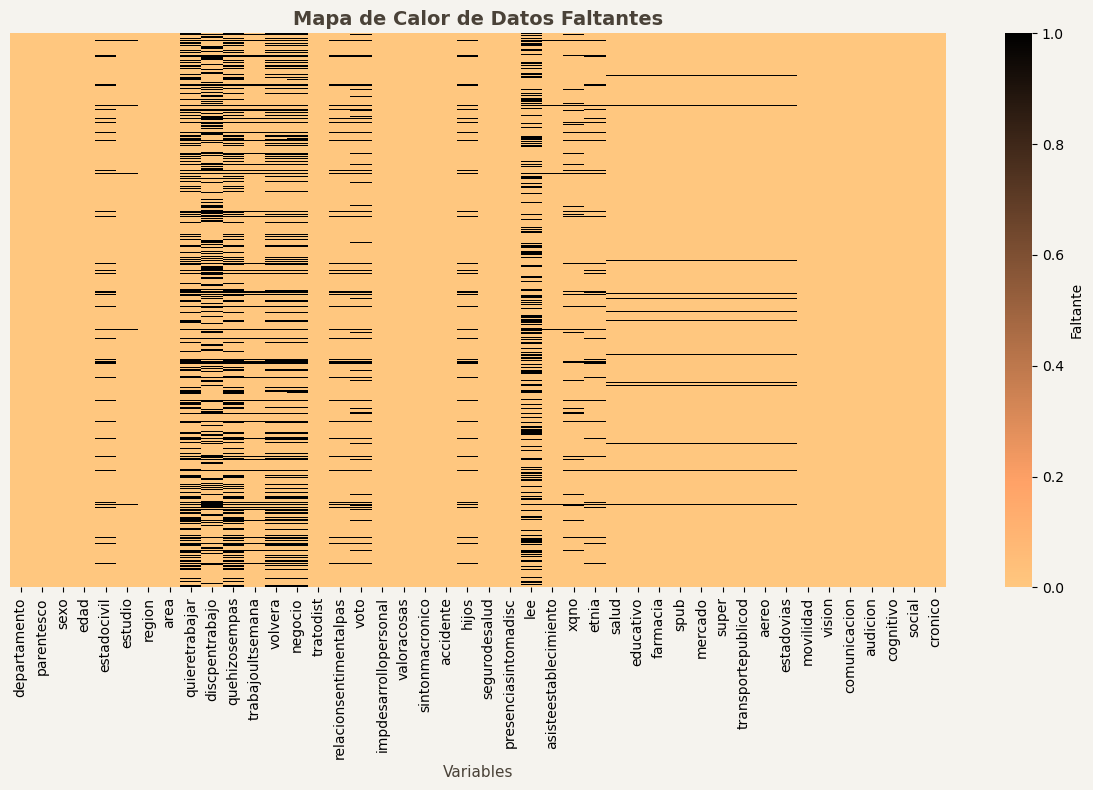

C:\Users\Rafael\AppData\Local\Temp\ipykernel_15144\2006610817.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=missing_df, x='Porcentaje', y='Variable',


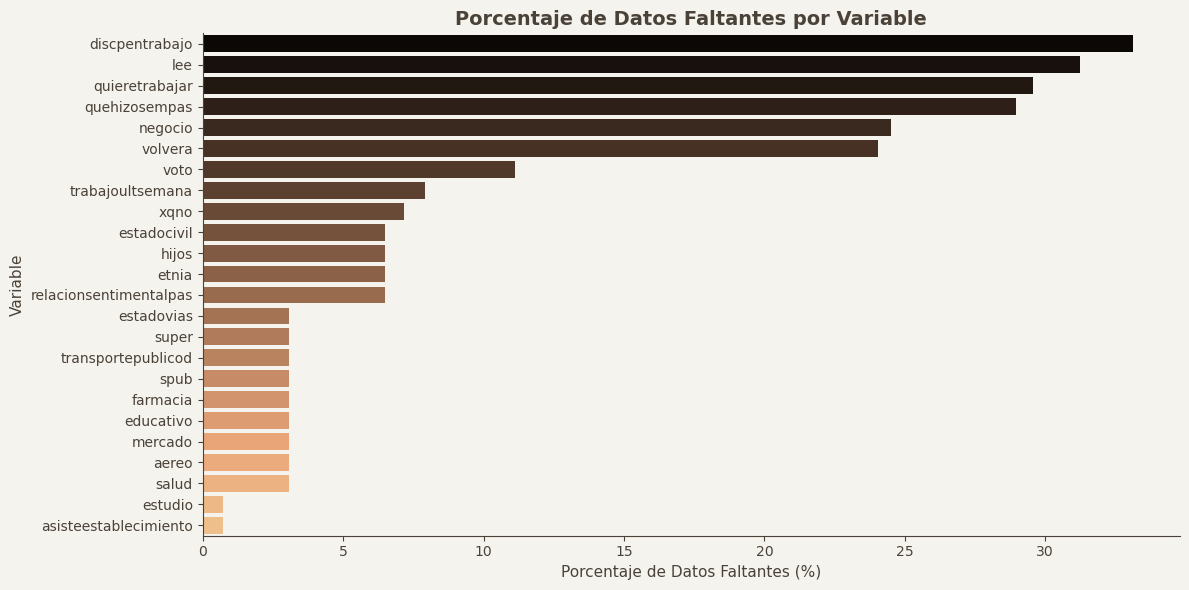


RESUMEN DE DATOS FALTANTES
              Variable  Valores Faltantes  Porcentaje
        discpentrabajo              12435   33.138791
                   lee              11726   31.249334
        quieretrabajar              11096   29.570408
         quehizosempas              10869   28.965462
               negocio               9197   24.509647
               volvera               9021   24.040614
                  voto               4170   11.112888
      trabajoultsemana               2975    7.928259
                  xqno               2693    7.176740
           estadocivil               2431    6.478520
                 hijos               2431    6.478520
                 etnia               2431    6.478520
relacionsentimentalpas               2431    6.478520
            estadovias               1158    3.086025
                 super               1158    3.086025
    transportepublicod               1158    3.086025
                  spub               1158    3.086025


In [17]:
import matplotlib.pyplot as plt

# Calcular porcentaje de valores faltantes por columna
missing_data = dataset.isnull().sum()
missing_percent = (missing_data / len(dataset)) * 100
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores Faltantes', ascending=False)

# Filtrar solo columnas con datos faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0]

# Color de fondo beige/crema
bg_color = '#F5F3EE'

# Visualización 1: Heatmap de datos faltantes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

sns.heatmap(dataset.isnull(), cbar=True, yticklabels=False, 
            cmap='copper_r', ax=ax, cbar_kws={'label': 'Faltante'})
plt.title('Mapa de Calor de Datos Faltantes', fontsize=14, fontweight='bold', color='#4A4238')
plt.xlabel('Variables', fontsize=11, color='#4A4238')
plt.tight_layout()
plt.show()

# Visualización 2: Barplot con paleta que combina
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor(bg_color)
    ax.set_facecolor(bg_color)
    
    # Paleta de tonos tierra/cálidos que combinan con beige
    sns.barplot(data=missing_df, x='Porcentaje', y='Variable', 
                palette='copper', ax=ax)
    
    plt.xlabel('Porcentaje de Datos Faltantes (%)', fontsize=11, color='#4A4238')
    plt.ylabel('Variable', fontsize=11, color='#4A4238')
    plt.title('Porcentaje de Datos Faltantes por Variable', 
              fontsize=14, fontweight='bold', color='#4A4238')
    
    # Personalizar ejes
    ax.tick_params(colors='#4A4238')
    ax.spines['bottom'].set_color('#4A4238')
    ax.spines['left'].set_color('#4A4238')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla resumen
    print("\n" + "="*60)
    print("RESUMEN DE DATOS FALTANTES")
    print("="*60)
    print(missing_df.to_string(index=False))
else:
    print("¡No hay datos faltantes en el dataset!")

In [18]:
#Los menores de 12 años, solteros
dataset.loc[dataset['edad'] < 12, 'estadocivil'] = 0

In [19]:
#No estudio, los menores de 5 años
dataset.loc[dataset['edad'] < 5, 'estudio'] = 1

In [20]:
#No ssabe leer y escribir los menores de 5 años
dataset.loc[dataset['edad'] < 5, 'lee'] = 2

In [21]:
dataset.loc[dataset['edad'] < 5, 'xqno'] = 0

In [22]:
nanlee = dataset[dataset['lee'].isna()]['edad'].value_counts()

In [23]:
premedios = dataset.groupby('edad')['lee'].mean()


# Calculamos la probabilidad de ser '2' para cada edad
# Si el promedio es 1.7, prob_de_ser_2 es 0.7
prob_de_ser_2 = premedios - 1

# --- 2. Mapear la probabilidad a CADA fila ---

# Creamos una columna temporal.
# .map() asigna a cada fila la probabilidad que le corresponde
# según su 'edad'.
dataset['temp_prob'] = dataset['edad'].map(prob_de_ser_2)

# --- 3. Generar valores aleatorios (Vectorizado) ---

# Identificamos las filas que vamos a rellenar (donde 'lee' es NaN)
filas_nan = dataset['lee'].isna()

# Contamos cuántas son
n_nans = filas_nan.sum()

# Obtenemos las probabilidades específicas para esas filas NaN
probabilidades_nan = dataset.loc[filas_nan, 'temp_prob']

# Generamos un número aleatorio (entre 0 y 1) para CADA NaN
aleatorios = np.random.rand(n_nans)

# --- 4. Comparar y crear los nuevos valores ---

# Comparamos: Si el aleatorio < probabilidad, le asignamos 2. Si no, 1.
# (Ej: si prob=0.7 y aleatorio=0.6, se vuelve 2. Si aleatorio=0.8, se vuelve 1)
nuevos_valores = np.where(aleatorios < probabilidades_nan, 2, 1)

# --- 5. Rellenar los NaN ---

# Asignamos los nuevos valores SOLAMENTE a las filas que eran NaN
dataset.loc[filas_nan, 'lee'] = nuevos_valores

# --- 6. Limpiar ---
dataset.drop(columns='temp_prob', inplace=True)

In [24]:
dataset[dataset['farmacia'].isna()]['departamento'].value_counts()

departamento
LIMA             254
CALLAO            81
UCAYALI           69
ANCASH            68
AMAZONAS          60
PUNO              59
JUNIN             52
AYACUCHO          45
APURIMAC          44
CAJAMARCA         43
HUANCAVELICA      43
AREQUIPA          40
HUANUCO           39
LAMBAYEQUE        33
SAN MARTIN        29
PIURA             27
CUSCO             26
PASCO             24
ICA               22
LORETO            19
LA LIBERTAD       18
MOQUEGUA          18
TACNA             17
TUMBES            15
MADRE DE DIOS     13
Name: count, dtype: int64

In [25]:
dataset.loc[dataset['edad'] < 14, 'quieretrabajar'] = 0

dataset['quieretrabajar'] = pd.to_numeric(dataset['quieretrabajar'], errors='coerce')

In [26]:
dataset.loc[dataset['edad'] < 14, 'discpentrabajo'] = 0

dataset['discpentrabajo'] = pd.to_numeric(dataset['discpentrabajo'], errors='coerce')

In [27]:
lista_empleo_filtrar = list(nombre_empleo.values())
dataset.loc[dataset['edad'] < 14, lista_empleo_filtrar] = 0

for columna in lista_empleo_filtrar:
    dataset[columna] = pd.to_numeric(dataset[columna], errors='coerce')

dataset['estudio'] = pd.to_numeric(dataset['estudio'], errors='coerce')

In [28]:
dataset.loc[dataset['edad'] < 18, 'voto'] = 0

In [29]:
dataset.loc[dataset['edad'] < 12, 'hijos'] = 2


In [30]:
dataset.loc[dataset['edad'] < 12, 'relacionsentimentalpas'] = 0


In [31]:
dataset.loc[dataset['edad'] < 12, 'etnia'] = 0

In [32]:
dataset['volvera'] = dataset['volvera'].fillna(0)

In [33]:
dataset['negocio'] = dataset['negocio'].fillna(0)

In [34]:
dataset['negocio'] = dataset['negocio'].fillna(0)


In [35]:
dataset.loc[dataset['trabajoultsemana'] == 1, 'quieretrabajar'] = 0

In [36]:
dataset.loc[dataset['trabajoultsemana'] == 1, 'quehizosempas'] = 0

In [37]:
dataset.loc[dataset['asisteestablecimiento'] == 1, 'xqno'] = 0

In [38]:
dataset.loc[dataset['relacionsentimentalpas'] == 9, 'relacionsentimentalpas'] = np.nan

In [39]:
dataset.drop(columns = 'trabajoprincipal',inplace= True)

In [40]:
dataset_limpio = dataset.dropna()

varselim = ['region','area',]
dataset_limpio = dataset_limpio.drop(varselim, axis=1)

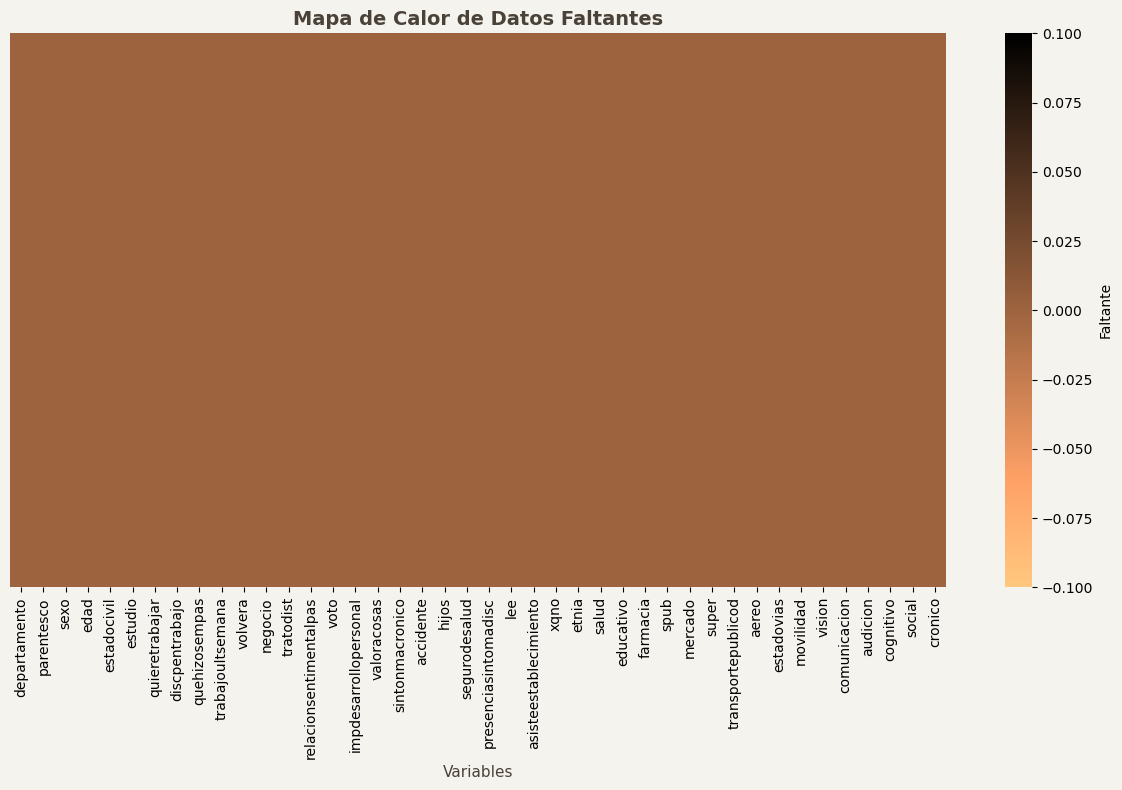

¡No hay datos faltantes en el dataset_limpio!


In [41]:


# Calcular porcentaje de valores faltantes por columna
missing_data = dataset_limpio.isnull().sum()
missing_percent = (missing_data / len(dataset_limpio)) * 100
missing_df = pd.DataFrame({
    'Variable': missing_data.index,
    'Valores Faltantes': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Valores Faltantes', ascending=False)

# Filtrar solo columnas con datos faltantes
missing_df = missing_df[missing_df['Valores Faltantes'] > 0]

# Color de fondo beige/crema
bg_color = '#F5F3EE'

# Visualización 1: Heatmap de datos faltantes
fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

sns.heatmap(dataset_limpio.isnull(), cbar=True, yticklabels=False, 
            cmap='copper_r', ax=ax, cbar_kws={'label': 'Faltante'})
plt.title('Mapa de Calor de Datos Faltantes', fontsize=14, fontweight='bold', color='#4A4238')
plt.xlabel('Variables', fontsize=11, color='#4A4238')
plt.tight_layout()
plt.show()

# Visualización 2: Barplot con paleta que combina
if len(missing_df) > 0:
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.patch.set_facecolor(bg_color)
    ax.set_facecolor(bg_color)
    
    # Paleta de tonos tierra/cálidos que combinan con beige
    sns.barplot(data=missing_df, x='Porcentaje', y='Variable', 
                palette='copper', ax=ax)
    
    plt.xlabel('Porcentaje de Datos Faltantes (%)', fontsize=11, color='#4A4238')
    plt.ylabel('Variable', fontsize=11, color='#4A4238')
    plt.title('Porcentaje de Datos Faltantes por Variable', 
              fontsize=14, fontweight='bold', color='#4A4238')
    
    # Personalizar ejes
    ax.tick_params(colors='#4A4238')
    ax.spines['bottom'].set_color('#4A4238')
    ax.spines['left'].set_color('#4A4238')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla resumen
    print("\n" + "="*60)
    print("RESUMEN DE DATOS FALTANTES")
    print("="*60)
    print(missing_df.to_string(index=False))
else:
    print("¡No hay datos faltantes en el dataset_limpio!")

In [42]:

variablesdummy = ['departamento', 'parentesco',     'sexo',       'estadocivil', 'estudio', 'quieretrabajar',
                 'discpentrabajo', 'quehizosempas', 'trabajoultsemana', 'negocio','volvera','tratodist', 'relacionsentimentalpas',
                  'voto', 'impdesarrollopersonal',  'valoracosas',    'sintonmacronico',    'accidente',  'hijos', 
                  'segurodesalud','presenciasintomadisc', 'lee',     'asisteestablecimiento', 'xqno',    'etnia',
                  'educativo',    'farmacia',       'spub',          'mercado',              'super',    'aereo',       
                  'estadovias', 'movilidad',        'vision',       'comunicacion',       'audicion',   'cognitivo', 
                  'social',     'cronico']

# Verifica si todas las columnas están en el DataFrame
missing_columns = [col for col in variablesdummy if col not in dataset_limpio.columns]
if missing_columns:
    print("Las siguientes columnas no se encuentran en el DataFrame:")
    print(missing_columns)
else:
    # Si todas las columnas están presentes, procede a crear las variables dummy
    dummies = pd.get_dummies(
        dataset_limpio,
        columns=variablesdummy,
        drop_first=True,
        dummy_na=False,
        dtype="uint8"
    )
    dataset_limpio = dummies

In [43]:
dataset_limpio

,edad,salud,transportepublicod,departamento_ANCASH,departamento_APURIMAC,departamento_AREQUIPA,departamento_AYACUCHO,departamento_CAJAMARCA,departamento_CALLAO,departamento_CUSCO,...,aereo_9.0,estadovias_2.0,estadovias_9.0,movilidad_2,vision_2,comunicacion_2,audicion_2,cognitivo_2,social_2,cronico_2
0,56,2.0,2.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,0
2,13,2.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,1
4,52,1.0,2.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,1
5,54,2.0,2.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,0
6,46,1.0,2.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37518,83,2.0,3.0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,1
37519,73,2.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,1,1,1
37521,45,2.0,2.0,0,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,1,1
37522,77,1.0,1.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,1,0


In [44]:
y = dataset_limpio['impdesarrollopersonal_2']
X = dataset_limpio.drop('impdesarrollopersonal_2', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:

# 1. Crea el escalar
scaler_edad = StandardScaler()

# 2. Hace copias de tus DataFrames para evitar el "SettingWithCopyWarning"
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# 3. Ajusta y transforma (fit_transform) SOLO en 'edad' de ENTRENAMIENTO
# El escalar "aprende" la media y la desv. estándar de X_train
X_train_scaled['edad'] = scaler_edad.fit_transform(X_train[['edad']])

# 4. Aplica (transform) SOLAMENTE en 'edad' de PRUEBA
# Aquí solo "transforma" usando la media y desv. que aprendió de X_train
# ¡¡No se usa .fit()!!
X_test_scaled['edad'] = scaler_edad.transform(X_test[['edad']])

Iniciando búsqueda de hiperparámetros para KNN...
Búsqueda finalizada.
Mejores parámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}
Mejor score (accuracy) en CV: 0.7442
Score AUC (KNN) en Test: 0.8066


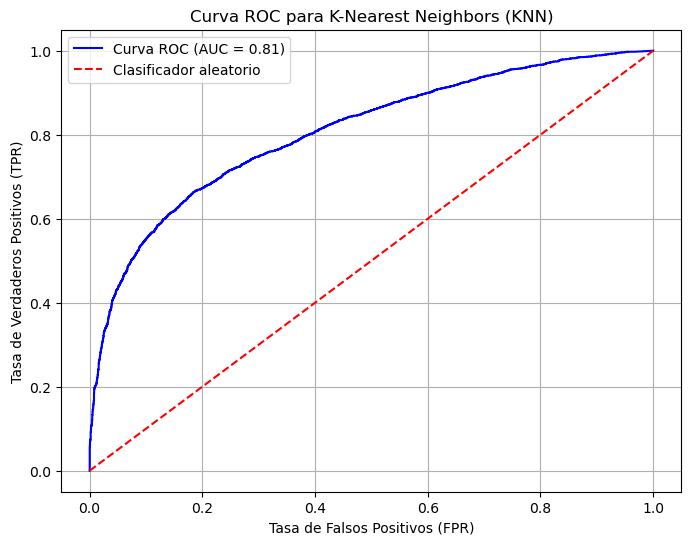

In [46]:
# Es para el número de núcleos que usará porque sino tira warning en el conteo de nucleos que usa uno de los procesos

os.environ["LOKY_MAX_CPU_COUNT"] = "4"  

knn = KNeighborsClassifier()

# b. la grilla de hiperparámetros de KNN
param_grid = {
    'n_neighbors': [ 15],  # El valor de K
    'weights': ['distance'], # Cómo pesan los vecinos
    'metric': [ 'manhattan'] # Tipo de distancia
}

# c. Configurar la búsqueda en grilla
# Usamos n_jobs=-1 para que use todos los procesadores (más rápido)
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# d. Ejecutar la búsqueda (¡Usando los datos escalados!)
print("Iniciando búsqueda de hiperparámetros para KNN...")
grid_search_knn.fit(X_train_scaled, y_train)

# --- 2. MOSTRAR MEJORES RESULTADOS ---
print("Búsqueda finalizada.")
print(f"Mejores parámetros para KNN: {grid_search_knn.best_params_}")
print(f"Mejor score (accuracy) en CV: {grid_search_knn.best_score_:.4f}")

# --- 3. OBTENER PREDICCIONES Y GRAFICAR ROC ---

# a. Obtener el mejor modelo (ya entrenado)
best_model = grid_search_knn.best_estimator_

# b. Obtiene las probabilidades sobre el set de PRUEBA (escalado)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# c. Calcula el score AUC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC (KNN) en Test: {auc_score:.4f}")

# d. Calcula los puntos de la curva (FPR, TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# e. Grafico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC para K-Nearest Neighbors (KNN)')
plt.legend()
plt.grid()
plt.show()

MODELO BASE: REGRESIÓN LOGÍSTICA

✓ Modelo entrenado exitosamente!

MÉTRICAS DE DESEMPEÑO

Exactitud (Accuracy): 81.10%
ROC-AUC Score: 0.8509

------------------------------------------------------------
Reporte de Clasificación:
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      4213
           1       0.91      0.63      0.75      3304

    accuracy                           0.81      7517
   macro avg       0.84      0.79      0.80      7517
weighted avg       0.83      0.81      0.80      7517



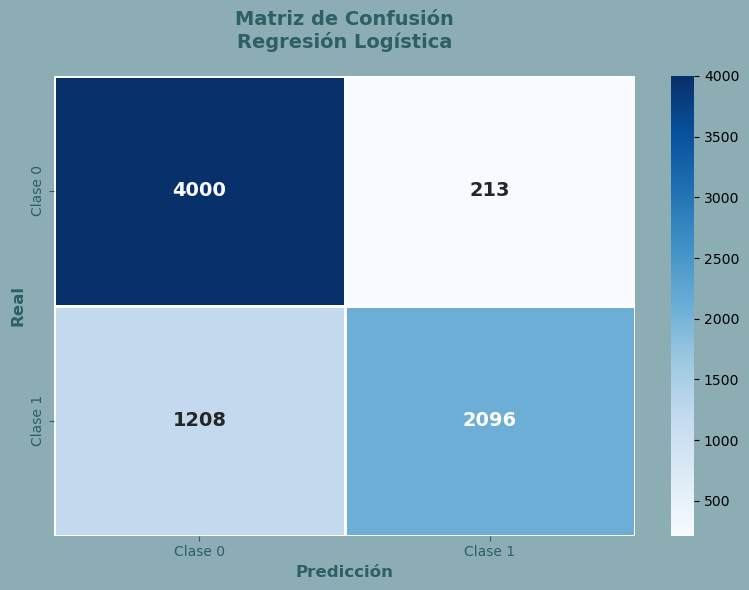

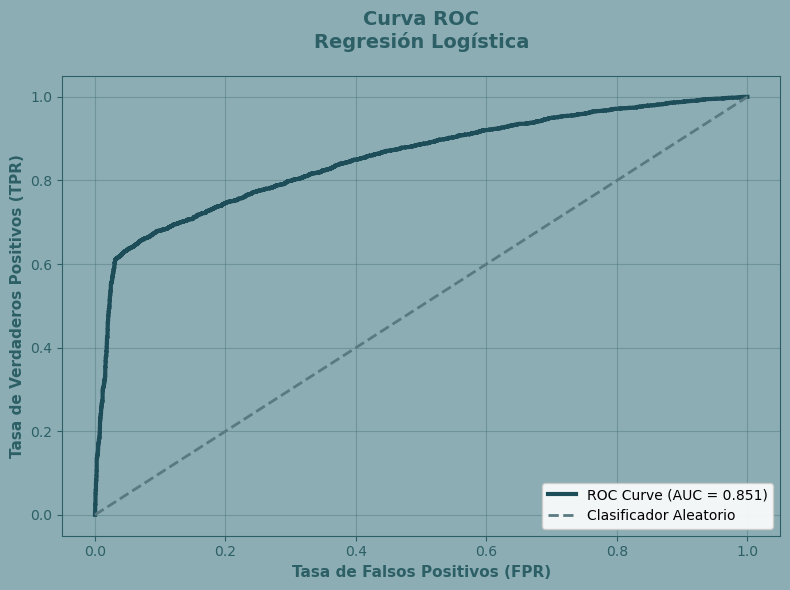

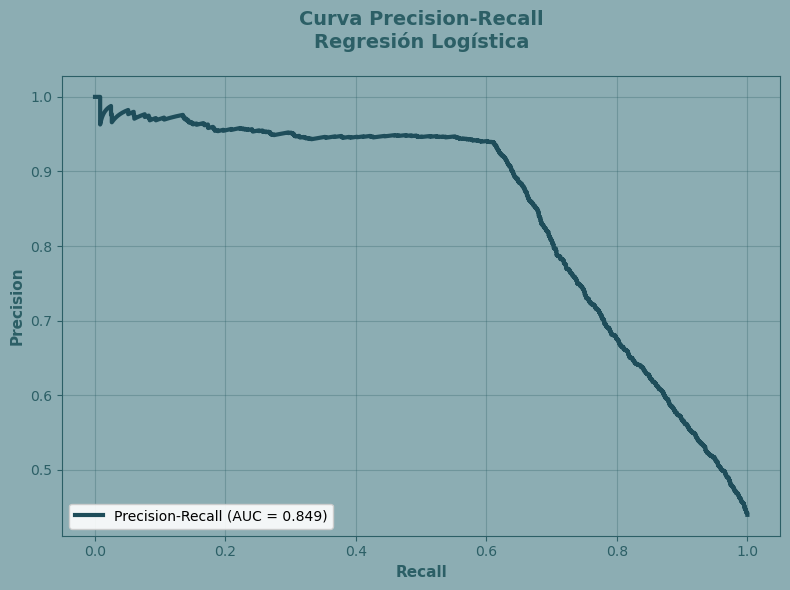

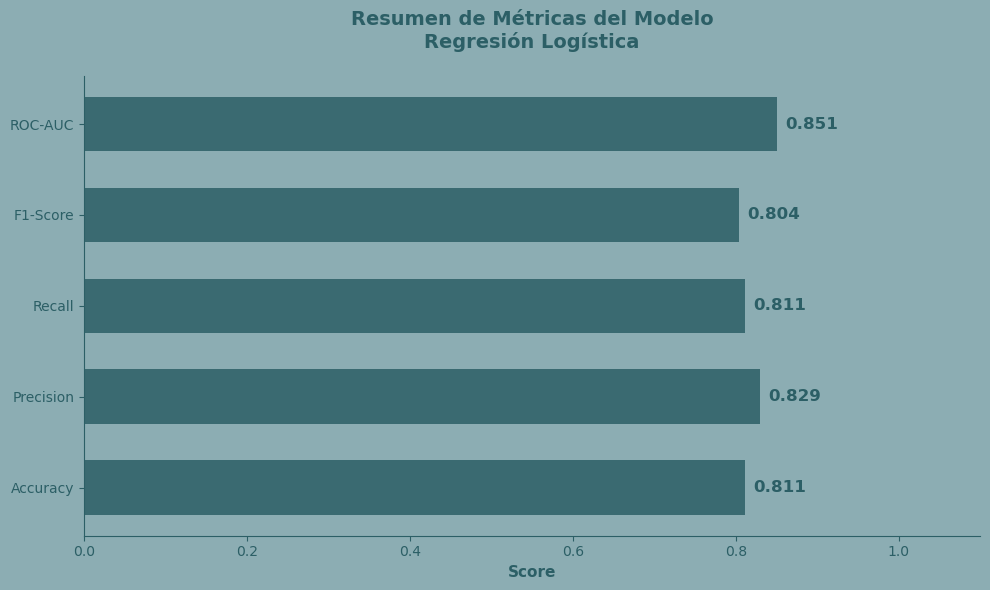


RESUMEN PARA PRESENTACIÓN

📊 MODELO: Regresión Logística
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 MÉTRICAS PRINCIPALES:
   • Accuracy:     0.8110 (81.10%)
   • Precision:    0.8295
   • Recall:       0.8110
   • F1-Score:     0.8042
   • ROC-AUC:      0.8509

🎯 MATRIZ DE CONFUSIÓN:
[[4000  213]
 [1208 2096]]

💡 INTERPRETACIÓN:
   • El modelo clasifica correctamente el 81.1% de los casos
   • El área bajo la curva ROC es 0.851



In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score, precision_recall_curve, auc)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ========== ENTRENAMIENTO DEL MODELO ==========
print("="*60)
print("MODELO BASE: REGRESIÓN LOGÍSTICA")
print("="*60)

# Configurar y entrenar el modelo
model = LogisticRegression(solver='liblinear', max_iter=3000, random_state=42)
model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

print("\n✓ Modelo entrenado exitosamente!")

# ========== MÉTRICAS PRINCIPALES ==========
print("\n" + "="*60)
print("MÉTRICAS DE DESEMPEÑO")
print("="*60)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nExactitud (Accuracy): {accuracy * 100:.2f}%")
print(f"ROC-AUC Score: {roc_auc:.4f}")

print("\n" + "-"*60)
print("Reporte de Clasificación:")
print("-"*60)
print(classification_report(y_test, y_pred))

# ========== VISUALIZACIONES ==========

# Color de fondo azul verdoso
bg_color = '#8CADB3'
text_color = '#2C5F66'
accent_color = '#2C5F66'

# 1. MATRIZ DE CONFUSIÓN
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            linewidths=2, linecolor='white',
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'],
            annot_kws={'size': 14, 'weight': 'bold'})

plt.xlabel('Predicción', fontsize=12, fontweight='bold', color=text_color)
plt.ylabel('Real', fontsize=12, fontweight='bold', color=text_color)
plt.title('Matriz de Confusión\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)

ax.tick_params(colors=text_color)
plt.tight_layout()
plt.show()

# 2. CURVA ROC
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr, color='#1E4D5A', linewidth=3, 
         label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='#5A7A82', linestyle='--', linewidth=2, 
         label='Clasificador Aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Curva ROC\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, color=text_color)

ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)

plt.tight_layout()
plt.show()

# 3. CURVA PRECISION-RECALL
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, color='#1E4D5A', linewidth=3, 
         label=f'Precision-Recall (AUC = {pr_auc:.3f})')

plt.xlabel('Recall', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Precision', fontsize=11, fontweight='bold', color=text_color)
plt.title('Curva Precision-Recall\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower left', fontsize=10, framealpha=0.9)
plt.grid(True, alpha=0.3, color=text_color)

ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)

plt.tight_layout()
plt.show()

# 4. RESUMEN VISUAL DE MÉTRICAS
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

from sklearn.metrics import precision_score, recall_score, f1_score

metrics_data = {
    'Accuracy': [accuracy],
    'Precision': [precision_score(y_test, y_pred, average='weighted')],
    'Recall': [recall_score(y_test, y_pred, average='weighted')],
    'F1-Score': [f1_score(y_test, y_pred, average='weighted')],
    'ROC-AUC': [roc_auc]
}

metrics_names = list(metrics_data.keys())
metrics_values = [metrics_data[m][0] for m in metrics_names]

bars = plt.barh(metrics_names, metrics_values, color='#2C5F66', alpha=0.85, height=0.6)

for i, (bar, value) in enumerate(zip(bars, metrics_values)):
    plt.text(value + 0.01, i, f'{value:.3f}', 
             va='center', fontweight='bold', color=text_color, fontsize=12)

plt.xlabel('Score', fontsize=11, fontweight='bold', color=text_color)
plt.title('Resumen de Métricas del Modelo\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.xlim(0, 1.1)

ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# ========== TABLA RESUMEN PARA FILMINA ==========
print("\n" + "="*60)
print("RESUMEN PARA PRESENTACIÓN")
print("="*60)
print(f"""
📊 MODELO: Regresión Logística
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

📈 MÉTRICAS PRINCIPALES:
   • Accuracy:     {accuracy:.4f} ({accuracy*100:.2f}%)
   • Precision:    {precision_score(y_test, y_pred, average='weighted'):.4f}
   • Recall:       {recall_score(y_test, y_pred, average='weighted'):.4f}
   • F1-Score:     {f1_score(y_test, y_pred, average='weighted'):.4f}
   • ROC-AUC:      {roc_auc:.4f}

🎯 MATRIZ DE CONFUSIÓN:
{cm}

💡 INTERPRETACIÓN:
   • El modelo clasifica correctamente el {accuracy*100:.1f}% de los casos
   • El área bajo la curva ROC es {roc_auc:.3f}
""")

In [48]:
log_reg = LogisticRegression(solver='liblinear') 

# 2. Define la grilla de hiperparámetros
# Queremos probar todos estos valores de C combinados con ambas penalizaciones
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Lista de valores de C a probar
    'penalty': ['l1', 'l2']         # Lista de penalizaciones a probar
}

# 3. Configura la búsqueda en grilla
# cv=5 significa que usará validación cruzada de 5 folds
# scoring='accuracy' (o 'roc_auc', etc.) le dice qué métrica optimizar
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')

# 4. Ejecuta la búsqueda
# Esto entrenará todos los modelos para cada combinación
grid_search.fit(X_train_scaled, y_train)

# 5. Muestra los mejores parámetros encontrados
print(f"Mejores parámetros: {grid_search.best_params_}")

# 6. Muestra el mejor score
print(f"Mejor score (accuracy): {grid_search.best_score_}")

Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
Mejor score (accuracy): 0.811541504058181


MÉTRICAS DE CLASIFICACIÓN - Regresión Logística

Accuracy test: 0.8115

Reporte de Clasificación Completo:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85      4213
           1       0.91      0.63      0.75      3304

    accuracy                           0.81      7517
   macro avg       0.84      0.79      0.80      7517
weighted avg       0.83      0.81      0.80      7517


Mejores parámetros: {'C': 0.1, 'penalty': 'l2'}
Mejor score CV (accuracy): 0.8115

MATRIZ DE CONFUSIÓN

 [[4018  195]
 [1222 2082]]


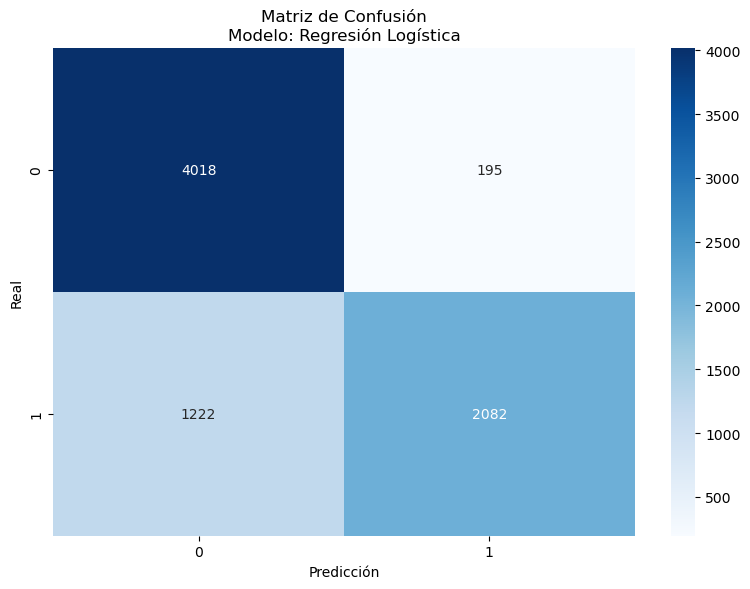

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer el mejor modelo
best_log_reg = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
y_pred_log = best_log_reg.predict(X_test_scaled)

# ========== MÉTRICAS DE CLASIFICACIÓN ==========
print("="*50)
print("MÉTRICAS DE CLASIFICACIÓN - Regresión Logística")
print("="*50)

# Accuracy
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'\nAccuracy test: {round(accuracy_log, 4)}')

# Reporte completo de clasificación
print('\nReporte de Clasificación Completo:')
print(classification_report(y_test, y_pred_log))

# Mejores parámetros encontrados
print(f'\nMejores parámetros: {grid_search.best_params_}')
print(f'Mejor score CV (accuracy): {round(grid_search.best_score_, 4)}')

# ========== MATRIZ DE CONFUSIÓN ==========
print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN")
print("="*50)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_log)
print("\n", cm)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión\nModelo: Regresión Logística')
plt.tight_layout()
plt.show()

Score AUC: 0.8515


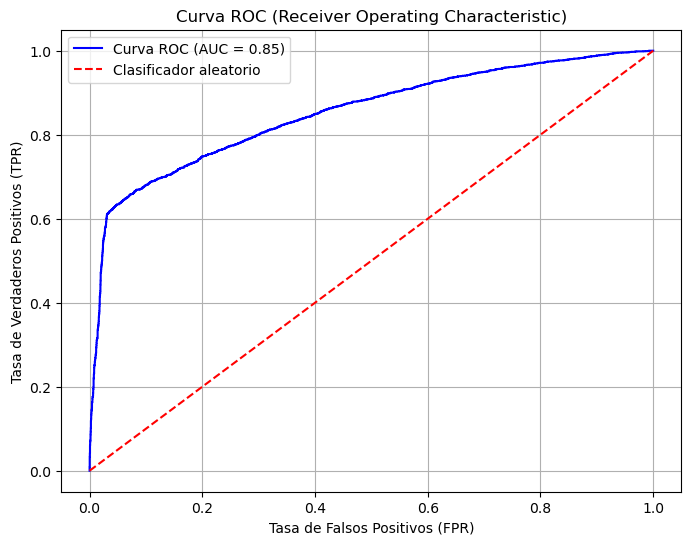

In [50]:

best_model = grid_search.best_estimator_

# b. Obtener las PROBABILIDADES de predicción sobre el set de PRUEBA
# .predict_proba() devuelve 2 columnas (prob de clase 0, prob de clase 1)
# Necesitamos la probabilidad de la clase positiva [:, 1]
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# --- 4. CALCULAR Y GRAFICAR LA CURVA ROC (Paso nuevo) 📈 ---

# a. Calcular el score AUC (Area Under the Curve)
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"Score AUC: {auc_score:.4f}")

# b. Calcular los puntos de la curva (FPR, TPR)
# fpr = False Positive Rate (Tasa de Falsos Positivos)
# tpr = True Positive Rate (Tasa de Verdaderos Positivos)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# c. Graficar
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Clasificador aleatorio') # Línea de referencia
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend()
plt.grid()
plt.show()

In [51]:
#Random forest

In [52]:
import math

num_columnas = X_train.shape[1]
m_sugerido = math.sqrt(num_columnas)
print(round(m_sugerido,0))

13.0


In [53]:
# max_features: es el subconjunto de predictores m (en slides) a considerar. El default es  max_features=1

regressor = RandomForestClassifier(n_estimators=173,  max_features=13, random_state=1) 
regressor.fit(X_train_scaled, y_train) 

y_pred = regressor.predict(X_test_scaled)

mse_test_rf1 = metrics.mean_squared_error(y_test, y_pred)
print('MSE testeo (m=35):', round(mse_test_rf1, 2))


MSE testeo (m=35): 0.18


In [54]:
regressor2 = RandomForestClassifier(n_estimators=173, max_features=50, random_state=1) 
regressor2.fit(X_train_scaled, y_train) 

y_pred2 = regressor2.predict(X_test_scaled)

mse_test_rf2 = metrics.mean_squared_error(y_test, y_pred2)
print('MSE testeo (m=50):', round(mse_test_rf2, 2))

MSE testeo (m=50): 0.18


In [55]:
regressor3 = RandomForestClassifier(n_estimators=173, max_features=100, random_state=1) 
regressor3.fit(X_train_scaled, y_train) 

y_pred3 = regressor3.predict(X_test_scaled)

mse_test_rf3 = metrics.mean_squared_error(y_test, y_pred3)
print('MSE testeo (m=100):', round(mse_test_rf3, 2))


MSE testeo (m=100): 0.18


In [56]:
y_pred3 = regressor3.predict(X_test)


In [57]:
# Set simple de Ranfom Forest
rf_model = RandomForestClassifier(max_samples=200, random_state=1) 

# Cantidad de predictures posibles a usar 
max_attributes = X_train.shape[1]
m_range = [20,10,30,40]
rf_para = {'max_features':m_range}

# Estimacion para la grilla de parametro de tunning
grid_search = GridSearchCV(rf_model, rf_para, cv=10, scoring='neg_median_absolute_error')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_samples=200, random_state=1),
             param_grid={'max_features': [20, 10, 30, 40]},
             scoring='neg_median_absolute_error')

MÉTRICAS DE CLASIFICACIÓN - Random Forest

Accuracy test: 0.8054
F1-Score test: 0.7993

Reporte de Clasificación Completo:
              precision    recall  f1-score   support

           0       0.77      0.93      0.84      4213
           1       0.88      0.64      0.74      3304

    accuracy                           0.81      7517
   macro avg       0.83      0.79      0.79      7517
weighted avg       0.82      0.81      0.80      7517


Mejores parámetros: {'max_features': 20}
Mejor score CV: 0.0

MATRIZ DE CONFUSIÓN


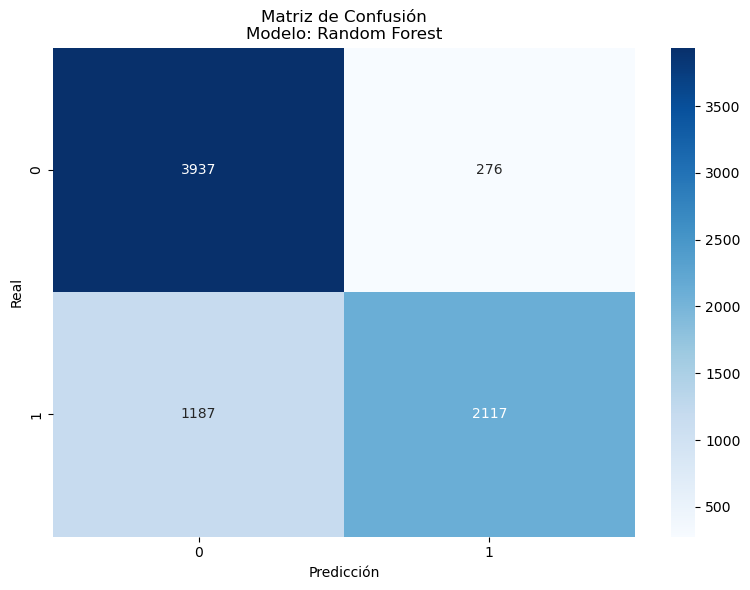


TOP 10 VARIABLES MÁS IMPORTANTES

 valoracosas_2         0.236128
edad                  0.053521
salud                 0.020741
transportepublicod    0.015777
cognitivo_2           0.013118
etnia_8.0             0.012784
spub_2.0              0.012316
lee_2.0               0.012204
social_2              0.011912
estadovias_2.0        0.011861
dtype: float64


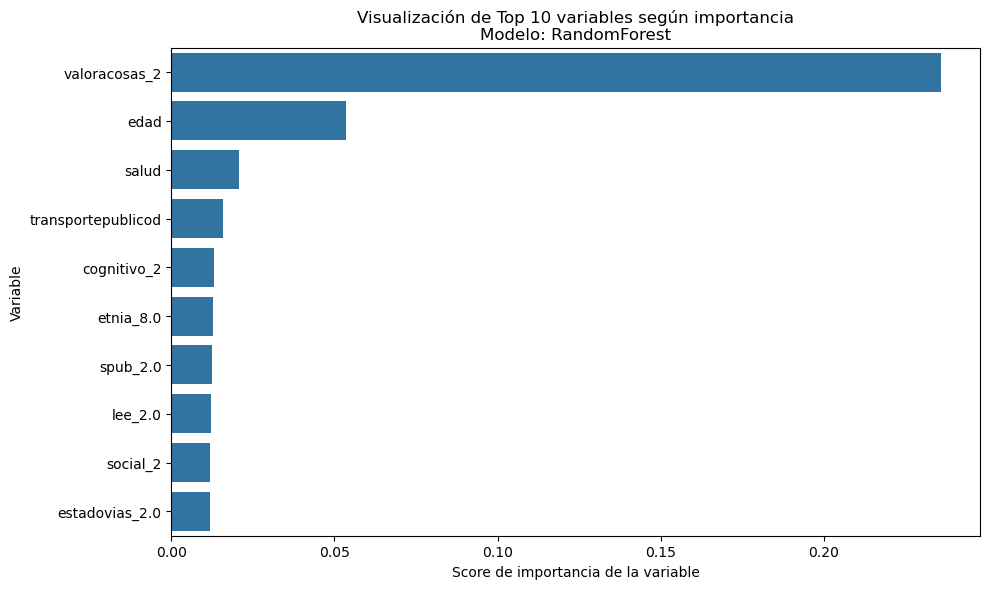

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Extraer el mejor modelo
best_rf = grid_search.best_estimator_

# Realizar predicciones
y_pred_rf = best_rf.predict(X_test)

# ========== MÉTRICAS DE CLASIFICACIÓN ==========
print("="*50)
print("MÉTRICAS DE CLASIFICACIÓN - Random Forest")
print("="*50)

# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'\nAccuracy test: {round(accuracy_rf, 4)}')

# F1-Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f'F1-Score test: {round(f1_rf, 4)}')

# Reporte completo de clasificación
print('\nReporte de Clasificación Completo:')
print(classification_report(y_test, y_pred_rf))

# Mejores parámetros encontrados
print(f'\nMejores parámetros: {grid_search.best_params_}')
print(f'Mejor score CV: {round(grid_search.best_score_, 4)}')

# ========== MATRIZ DE CONFUSIÓN ==========
print("\n" + "="*50)
print("MATRIZ DE CONFUSIÓN")
print("="*50)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred_rf)

# Visualizar matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión\nModelo: Random Forest')
plt.tight_layout()
plt.show()

# ========== IMPORTANCIA DE VARIABLES (TOP 10) ==========
print("\n" + "="*50)
print("TOP 10 VARIABLES MÁS IMPORTANTES")
print("="*50)

# Extraer importancia de variables
feature_imprf = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Mostrar top 10 en consola
print("\n", feature_imprf.head(10))

# Tomar solo el top 10
top_10 = feature_imprf.head(10)

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10, y=top_10.index)
plt.xlabel('Score de importancia de la variable')
plt.ylabel('Variable')
plt.title("Visualización de Top 10 variables según importancia\nModelo: RandomForest")
plt.tight_layout()
plt.show()

In [59]:
#

MODELO 1: REGRESIÓN LOGÍSTICA
✓ Accuracy: 0.8115
✓ ROC-AUC: 0.8515

MODELO 2: RANDOM FOREST - PARÁMETROS ÓPTIMOS

Entrenando Random Forest con parámetros óptimos...
Parámetros: {'max_depth': None, 'max_features': 'sqrt',
            'min_samples_leaf': 1, 'min_samples_split': 2,
            'n_estimators': 200}

✓ Accuracy: 0.8195
✓ ROC-AUC: 0.8710

MODELO 3: K-NEAREST NEIGHBORS - PARÁMETROS ÓPTIMOS

Entrenando KNN con parámetros óptimos...
Parámetros: {'metric': 'manhattan', 'n_neighbors': 20,
            'p': 1, 'weights': 'distance'}

✓ Accuracy: 0.7540
✓ ROC-AUC: 0.8125

VISUALIZACIONES - REGRESIÓN LOGÍSTICA


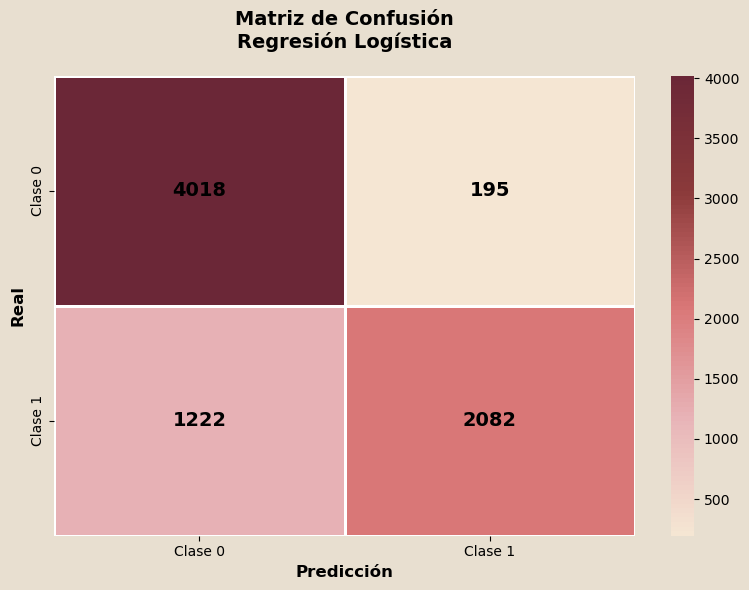

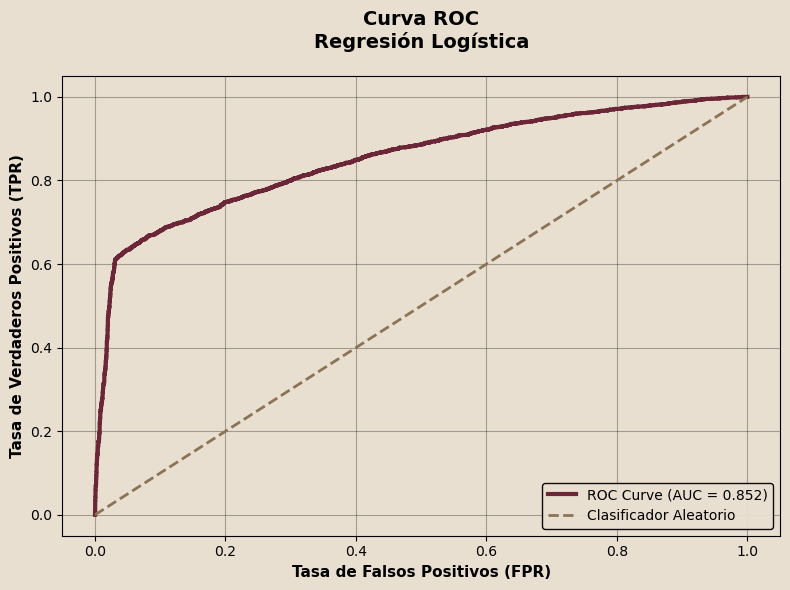

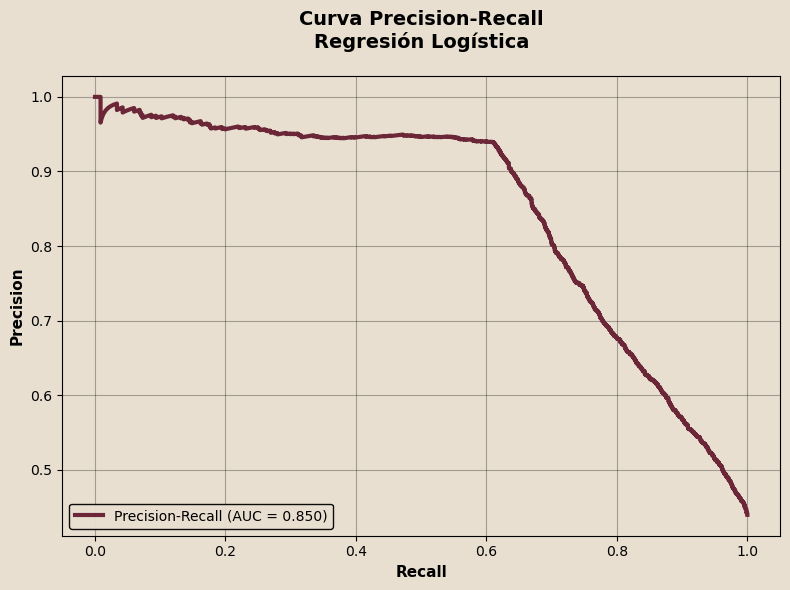

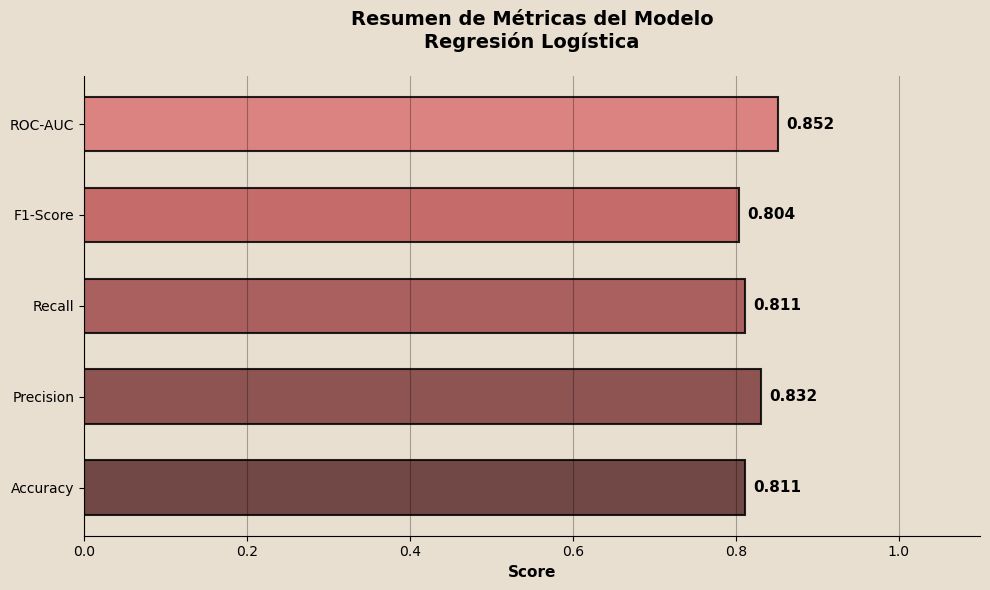


VISUALIZACIONES - RANDOM FOREST


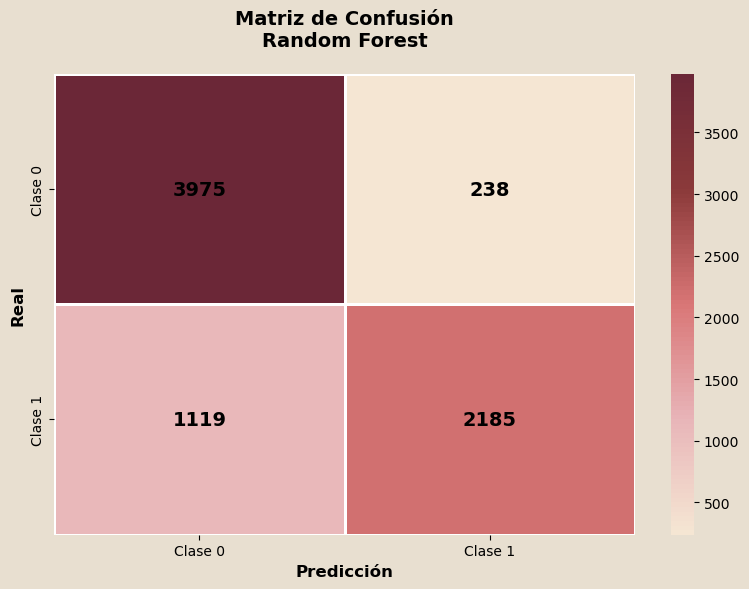

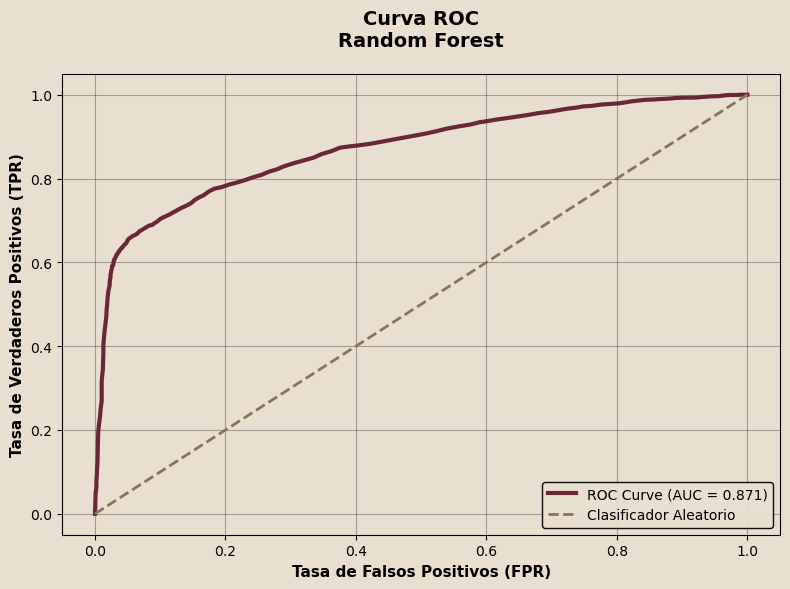

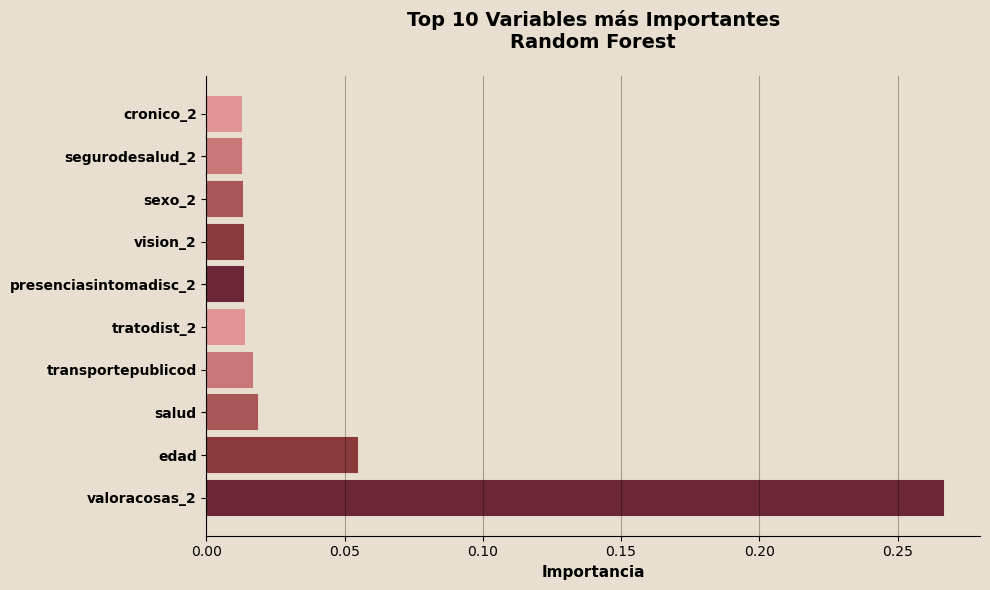


VISUALIZACIONES - KNN


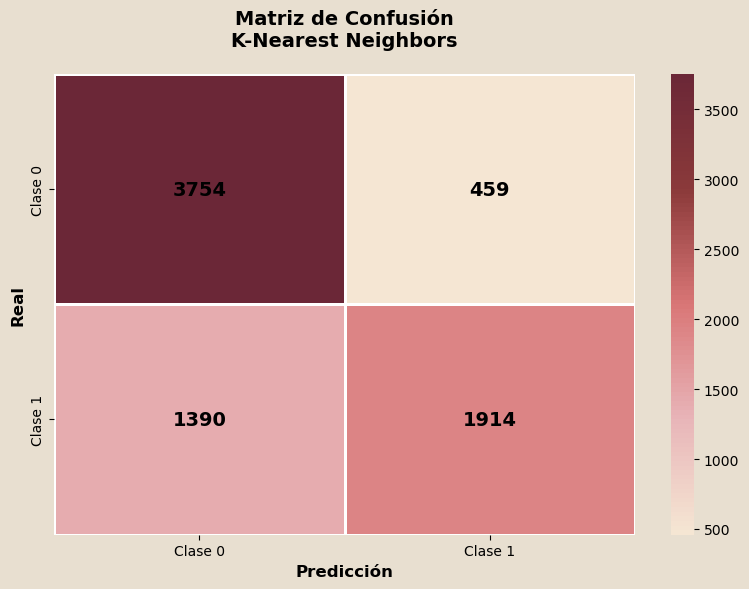

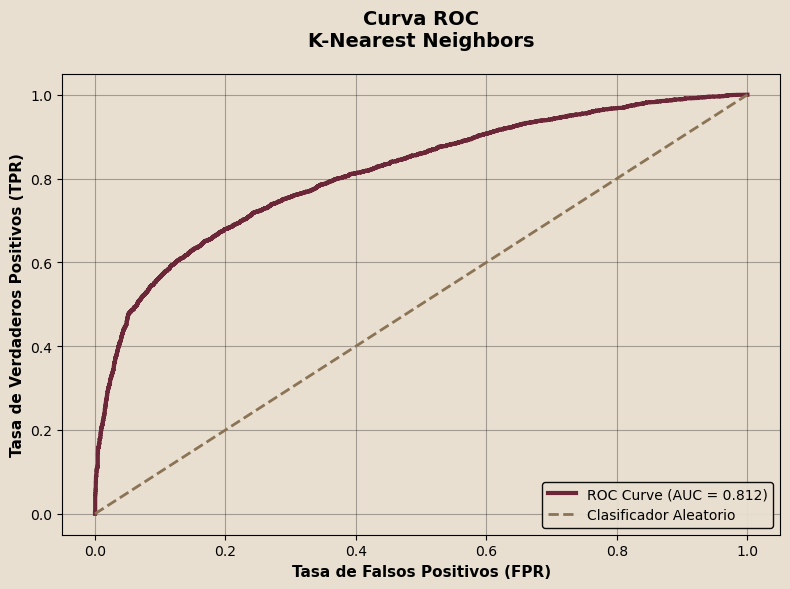


COMPARACIÓN DE MODELOS

              Modelo  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.811494   0.831655 0.811494  0.804390 0.851545
      Random Forest  0.819476   0.833709 0.819476  0.814135 0.870985
                KNN  0.754024   0.763535 0.754024  0.746092 0.812499


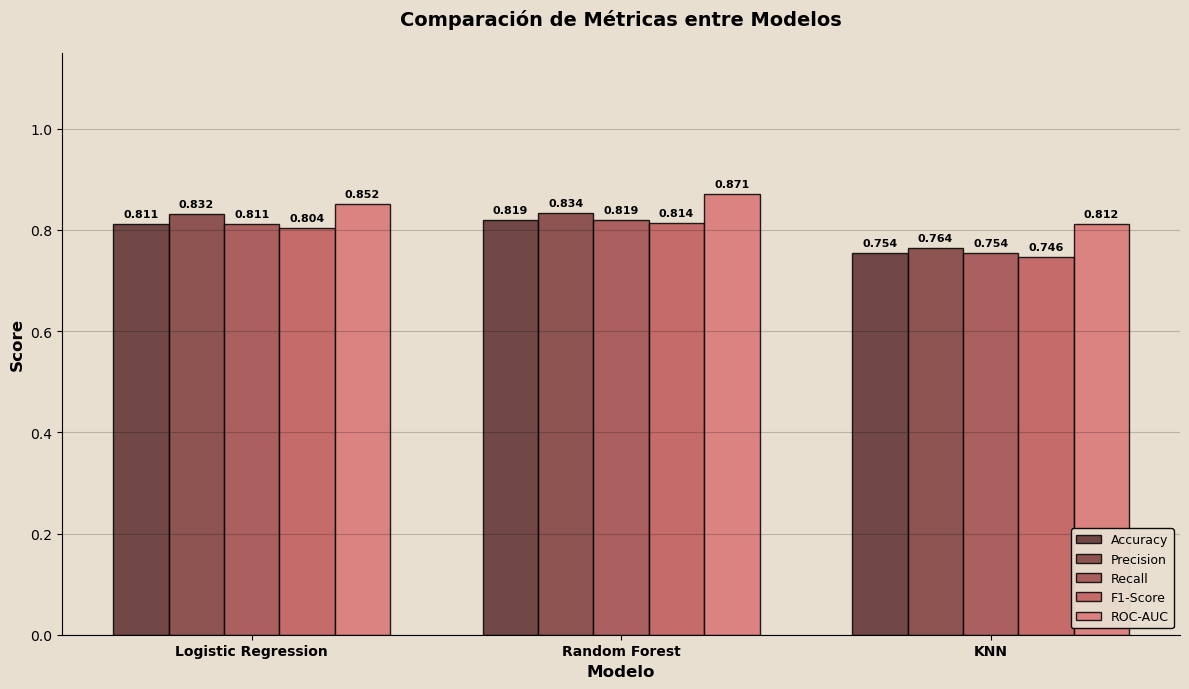

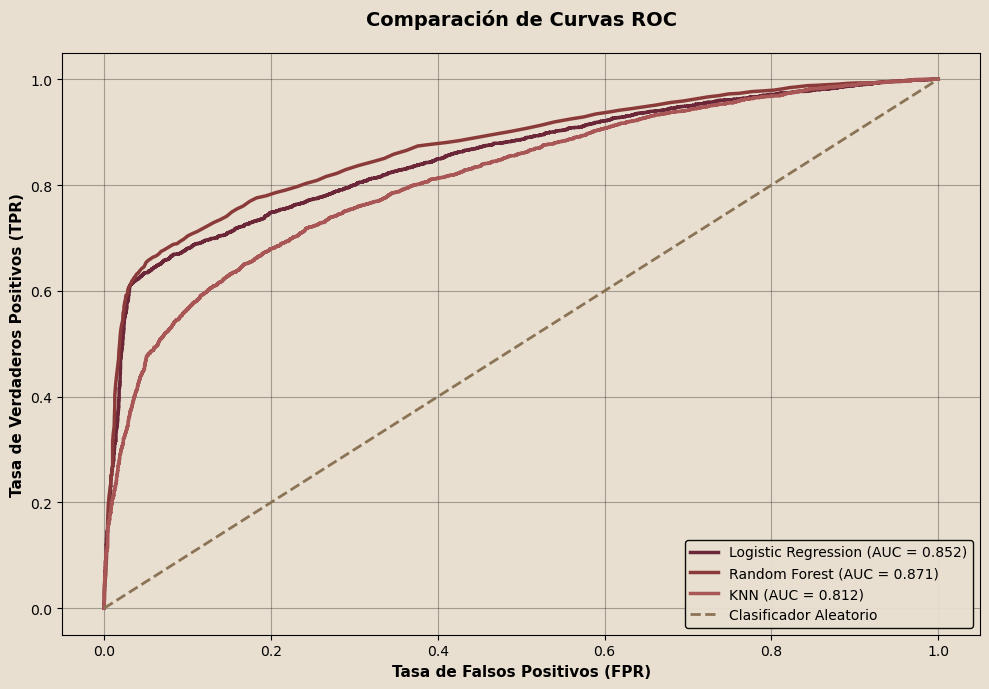

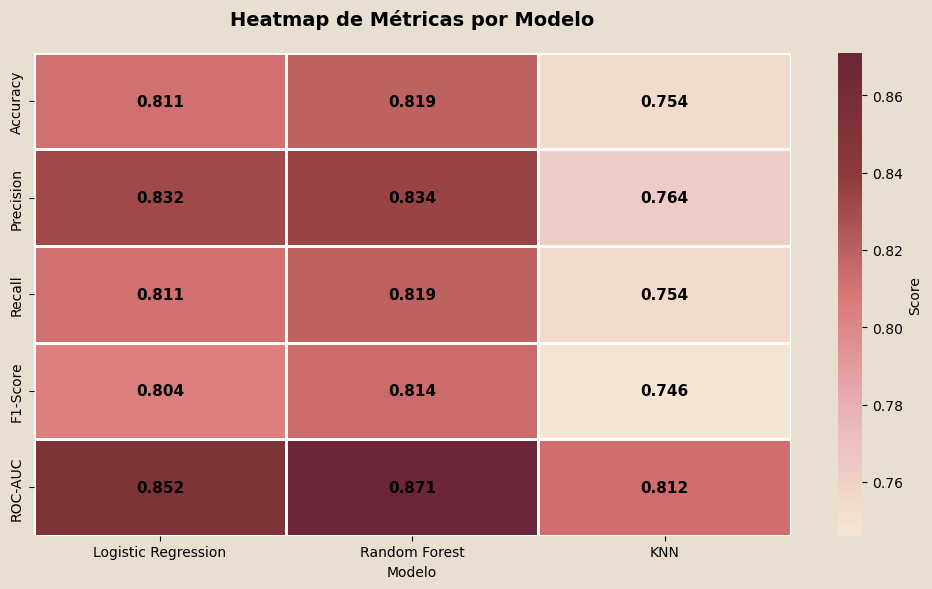


🏆 MEJOR MODELO: Random Forest
   ROC-AUC: 0.8710

PARÁMETROS ÓPTIMOS UTILIZADOS

📊 RANDOM FOREST:
   • max_depth: None
   • max_features: sqrt
   • min_samples_leaf: 1
   • min_samples_split: 2
   • n_estimators: 200

📊 KNN:
   • metric: manhattan
   • n_neighbors: 20
   • p: 1
   • weights: distance


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score, precision_recall_curve, auc,
                             precision_score, recall_score, f1_score)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# ============================================================================
# PALETA DE COLORES BORDO CON LETRAS NEGRAS
# ============================================================================
bg_color = '#E8DFD0'  # Beige claro
text_color = '#000000'  # NEGRO para mejor legibilidad
accent_color = '#8B3A3A'  # Bordo medio
bordo_light = '#A85656'  # Bordo claro
bordo_dark = '#6B2737'  # Bordo muy oscuro
complementary = '#8B7355'  # Marrón complementario

# Paletas para gráficos
bordo_palette = ['#6B2737', '#8B3A3A', '#A85656', '#C97676', '#E09595']
bordo_palette_5 = ['#5C2E2E', '#7D3C3C', '#9E4A4A', '#BF5858', '#D97373']

# Mapa de colores personalizado
colors_cm = ['#F5E6D3', '#E8B4B8', '#D97676', '#8B3A3A', '#6B2737']
n_bins = 100
cmap_bordo = LinearSegmentedColormap.from_list('bordo', colors_cm, N=n_bins)

# Diccionario para guardar resultados
results = {}

# ============================================================================
# 1. REGRESIÓN LOGÍSTICA (YA ENTRENADO)
# ============================================================================
print("="*70)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*70)

y_pred_log = best_log_reg.predict(X_test_scaled)
y_pred_proba_log = best_log_reg.predict_proba(X_test_scaled)[:, 1]

results['Logistic Regression'] = {
    'model': best_log_reg,
    'y_pred': y_pred_log,
    'y_pred_proba': y_pred_proba_log,
    'accuracy': accuracy_score(y_test, y_pred_log),
    'precision': precision_score(y_test, y_pred_log, average='weighted'),
    'recall': recall_score(y_test, y_pred_log, average='weighted'),
    'f1': f1_score(y_test, y_pred_log, average='weighted'),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_log)
}

print(f"✓ Accuracy: {results['Logistic Regression']['accuracy']:.4f}")
print(f"✓ ROC-AUC: {results['Logistic Regression']['roc_auc']:.4f}")

# ============================================================================
# 2. RANDOM FOREST - USANDO PARÁMETROS YA ENCONTRADOS
# ============================================================================
print("\n" + "="*70)
print("MODELO 2: RANDOM FOREST - PARÁMETROS ÓPTIMOS")
print("="*70)

# Crear modelo con los mejores parámetros ya encontrados
best_rf = RandomForestClassifier(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)

print("\nEntrenando Random Forest con parámetros óptimos...")
print("Parámetros: {'max_depth': None, 'max_features': 'sqrt',")
print("            'min_samples_leaf': 1, 'min_samples_split': 2,")
print("            'n_estimators': 200}")

best_rf.fit(X_train_scaled, y_train)

# Predicciones
y_pred_rf = best_rf.predict(X_test_scaled)
y_pred_proba_rf = best_rf.predict_proba(X_test_scaled)[:, 1]

results['Random Forest'] = {
    'model': best_rf,
    'y_pred': y_pred_rf,
    'y_pred_proba': y_pred_proba_rf,
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf, average='weighted'),
    'recall': recall_score(y_test, y_pred_rf, average='weighted'),
    'f1': f1_score(y_test, y_pred_rf, average='weighted'),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_rf),
    'best_params': {
        'max_depth': None,
        'max_features': 'sqrt',
        'min_samples_leaf': 1,
        'min_samples_split': 2,
        'n_estimators': 200
    }
}

print(f"\n✓ Accuracy: {results['Random Forest']['accuracy']:.4f}")
print(f"✓ ROC-AUC: {results['Random Forest']['roc_auc']:.4f}")

# ============================================================================
# 3. K-NEAREST NEIGHBORS - USANDO PARÁMETROS YA ENCONTRADOS
# ============================================================================
print("\n" + "="*70)
print("MODELO 3: K-NEAREST NEIGHBORS - PARÁMETROS ÓPTIMOS")
print("="*70)

# Crear modelo con los mejores parámetros ya encontrados
best_knn = KNeighborsClassifier(
    metric='manhattan',
    n_neighbors=20,
    p=1,
    weights='distance'
)

print("\nEntrenando KNN con parámetros óptimos...")
print("Parámetros: {'metric': 'manhattan', 'n_neighbors': 20,")
print("            'p': 1, 'weights': 'distance'}")

best_knn.fit(X_train_scaled, y_train)

# Predicciones
y_pred_knn = best_knn.predict(X_test_scaled)
y_pred_proba_knn = best_knn.predict_proba(X_test_scaled)[:, 1]

results['KNN'] = {
    'model': best_knn,
    'y_pred': y_pred_knn,
    'y_pred_proba': y_pred_proba_knn,
    'accuracy': accuracy_score(y_test, y_pred_knn),
    'precision': precision_score(y_test, y_pred_knn, average='weighted'),
    'recall': recall_score(y_test, y_pred_knn, average='weighted'),
    'f1': f1_score(y_test, y_pred_knn, average='weighted'),
    'roc_auc': roc_auc_score(y_test, y_pred_proba_knn),
    'best_params': {
        'metric': 'manhattan',
        'n_neighbors': 20,
        'p': 1,
        'weights': 'distance'
    }
}

print(f"\n✓ Accuracy: {results['KNN']['accuracy']:.4f}")
print(f"✓ ROC-AUC: {results['KNN']['roc_auc']:.4f}")

# ============================================================================
# VISUALIZACIONES PARA REGRESIÓN LOGÍSTICA
# ============================================================================
print("\n" + "="*70)
print("VISUALIZACIONES - REGRESIÓN LOGÍSTICA")
print("="*70)

# 1. Matriz de Confusión - Logistic Regression
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap=cmap_bordo, cbar=True, 
            linewidths=2, linecolor='white',
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'],
            annot_kws={'size': 14, 'weight': 'bold', 'color': text_color})

plt.xlabel('Predicción', fontsize=12, fontweight='bold', color=text_color)
plt.ylabel('Real', fontsize=12, fontweight='bold', color=text_color)
plt.title('Matriz de Confusión\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.tick_params(colors=text_color)
plt.tight_layout()
plt.show()

# 2. Curva ROC - Logistic Regression
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
plt.plot(fpr_log, tpr_log, color=bordo_dark, linewidth=3, 
         label=f'ROC Curve (AUC = {results["Logistic Regression"]["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], color=complementary, linestyle='--', linewidth=2,
         label='Clasificador Aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Curva ROC\nRegresión Logística', fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=0.95, 
          facecolor=bg_color, edgecolor=text_color)
plt.grid(True, alpha=0.3, color=text_color)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)
plt.tight_layout()
plt.show()

# 3. Curva Precision-Recall - Logistic Regression
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_pred_proba_log)
pr_auc = auc(recall_curve, precision_curve)

plt.plot(recall_curve, precision_curve, color=bordo_dark, linewidth=3, 
         label=f'Precision-Recall (AUC = {pr_auc:.3f})')

plt.xlabel('Recall', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Precision', fontsize=11, fontweight='bold', color=text_color)
plt.title('Curva Precision-Recall\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower left', fontsize=10, framealpha=0.95,
          facecolor=bg_color, edgecolor=text_color)
plt.grid(True, alpha=0.3, color=text_color)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)
plt.tight_layout()
plt.show()

# 4. Resumen de Métricas - Logistic Regression
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

metrics_log = {
    'Accuracy': results['Logistic Regression']['accuracy'],
    'Precision': results['Logistic Regression']['precision'],
    'Recall': results['Logistic Regression']['recall'],
    'F1-Score': results['Logistic Regression']['f1'],
    'ROC-AUC': results['Logistic Regression']['roc_auc']
}

metrics_names = list(metrics_log.keys())
metrics_values = list(metrics_log.values())

bars = plt.barh(metrics_names, metrics_values, 
                color=bordo_palette_5, alpha=0.85, height=0.6,
                edgecolor=text_color, linewidth=1.5)

for i, (bar, value) in enumerate(zip(bars, metrics_values)):
    plt.text(value + 0.01, i, f'{value:.3f}', 
             va='center', fontweight='bold', color=text_color, fontsize=11)

plt.xlabel('Score', fontsize=11, fontweight='bold', color=text_color)
plt.title('Resumen de Métricas del Modelo\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.xlim(0, 1.1)

ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, color=text_color)

plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZACIONES PARA RANDOM FOREST
# ============================================================================
print("\n" + "="*70)
print("VISUALIZACIONES - RANDOM FOREST")
print("="*70)

# Matriz de Confusión - RF
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap=cmap_bordo, cbar=True, 
            linewidths=2, linecolor='white',
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'],
            annot_kws={'size': 14, 'weight': 'bold', 'color': text_color})

plt.xlabel('Predicción', fontsize=12, fontweight='bold', color=text_color)
plt.ylabel('Real', fontsize=12, fontweight='bold', color=text_color)
plt.title('Matriz de Confusión\nRandom Forest', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.tick_params(colors=text_color)
plt.tight_layout()
plt.show()

# Curva ROC - RF
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, color=bordo_dark, linewidth=3, 
         label=f'ROC Curve (AUC = {results["Random Forest"]["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], color=complementary, linestyle='--', linewidth=2,
         label='Clasificador Aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Curva ROC\nRandom Forest', fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=0.95, 
          facecolor=bg_color, edgecolor=text_color)
plt.grid(True, alpha=0.3, color=text_color)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)
plt.tight_layout()
plt.show()

# Importancia de Variables - RF
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

feature_importance = pd.Series(best_rf.feature_importances_, 
                               index=X_train.columns).sort_values(ascending=False).head(10)

bars = plt.barh(range(len(feature_importance)), feature_importance.values, 
                edgecolor=bordo_dark, linewidth=1.5)

# Gradiente de colores en las barras
for i, bar in enumerate(bars):
    bar.set_color(bordo_palette[i % len(bordo_palette)])

plt.yticks(range(len(feature_importance)), feature_importance.index, 
          color=text_color, fontweight='bold', fontsize=10)
plt.xlabel('Importancia', fontsize=11, fontweight='bold', color=text_color)
plt.title('Top 10 Variables más Importantes\nRandom Forest', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, color=text_color)
plt.tight_layout()
plt.show()

# ============================================================================
# VISUALIZACIONES PARA KNN
# ============================================================================
print("\n" + "="*70)
print("VISUALIZACIONES - KNN")
print("="*70)

# Matriz de Confusión - KNN
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap=cmap_bordo, cbar=True, 
            linewidths=2, linecolor='white',
            xticklabels=['Clase 0', 'Clase 1'], 
            yticklabels=['Clase 0', 'Clase 1'],
            annot_kws={'size': 14, 'weight': 'bold', 'color': text_color})

plt.xlabel('Predicción', fontsize=12, fontweight='bold', color=text_color)
plt.ylabel('Real', fontsize=12, fontweight='bold', color=text_color)
plt.title('Matriz de Confusión\nK-Nearest Neighbors', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.tick_params(colors=text_color)
plt.tight_layout()
plt.show()

# Curva ROC - KNN
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
plt.plot(fpr_knn, tpr_knn, color=bordo_dark, linewidth=3, 
         label=f'ROC Curve (AUC = {results["KNN"]["roc_auc"]:.3f})')
plt.plot([0, 1], [0, 1], color=complementary, linestyle='--', linewidth=2,
         label='Clasificador Aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Curva ROC\nK-Nearest Neighbors', fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=0.95,
          facecolor=bg_color, edgecolor=text_color)
plt.grid(True, alpha=0.3, color=text_color)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)
plt.tight_layout()
plt.show()

# ============================================================================
# COMPARACIÓN DE LOS 3 MODELOS
# ============================================================================
print("\n" + "="*70)
print("COMPARACIÓN DE MODELOS")
print("="*70)

# Crear DataFrame de comparación
comparison_df = pd.DataFrame({
    'Modelo': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()]
})

print("\n", comparison_df.to_string(index=False))

# 1. Gráfico de barras comparativo
fig, ax = plt.subplots(figsize=(12, 7))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

x = np.arange(len(comparison_df['Modelo']))
width = 0.15
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics):
    offset = width * (i - 2)
    bars = ax.bar(x + offset, comparison_df[metric], width, 
                   label=metric, color=bordo_palette_5[i], alpha=0.85,
                   edgecolor=text_color, linewidth=1)
    
    # Añadir valores sobre las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                f'{height:.3f}', ha='center', va='bottom', 
                fontsize=8, color=text_color, fontweight='bold')

ax.set_xlabel('Modelo', fontsize=12, fontweight='bold', color=text_color)
ax.set_ylabel('Score', fontsize=12, fontweight='bold', color=text_color)
ax.set_title('Comparación de Métricas entre Modelos', 
             fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Modelo'], color=text_color, fontweight='bold', fontsize=10)
ax.legend(loc='lower right', fontsize=9, framealpha=0.95,
         facecolor=bg_color, edgecolor=text_color)
ax.set_ylim(0, 1.15)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, alpha=0.2, axis='y', color=text_color)

plt.tight_layout()
plt.show()

# 2. Curvas ROC comparativas
fig, ax = plt.subplots(figsize=(10, 7))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

colors_roc = ['#6B2737', '#8B3A3A', '#A85656']
for i, (model_name, model_data) in enumerate(results.items()):
    fpr, tpr, _ = roc_curve(y_test, model_data['y_pred_proba'])
    plt.plot(fpr, tpr, color=colors_roc[i], linewidth=2.5, 
             label=f'{model_name} (AUC = {model_data["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], color=complementary, linestyle='--', linewidth=2, 
         label='Clasificador Aleatorio')

plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=11, fontweight='bold', color=text_color)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Comparación de Curvas ROC', fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.legend(loc='lower right', fontsize=10, framealpha=0.95,
          facecolor=bg_color, edgecolor=text_color)
plt.grid(True, alpha=0.3, color=text_color)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_color(text_color)

plt.tight_layout()
plt.show()

# 3. Heatmap de métricas
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

comparison_matrix = comparison_df.set_index('Modelo')[metrics].T
sns.heatmap(comparison_matrix, annot=True, fmt='.3f', cmap=cmap_bordo, 
            cbar_kws={'label': 'Score'}, linewidths=2, linecolor='white',
            annot_kws={'size': 11, 'weight': 'bold', 'color': text_color})

plt.title('Heatmap de Métricas por Modelo', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.tick_params(colors=text_color)
plt.tight_layout()
plt.show()

# Identificar el mejor modelo
best_model_name = comparison_df.loc[comparison_df['ROC-AUC'].idxmax(), 'Modelo']
print(f"\n🏆 MEJOR MODELO: {best_model_name}")
print(f"   ROC-AUC: {comparison_df['ROC-AUC'].max():.4f}")

# ============================================================================
# RESUMEN DE PARÁMETROS ÓPTIMOS
# ============================================================================
print("\n" + "="*70)
print("PARÁMETROS ÓPTIMOS UTILIZADOS")
print("="*70)

print("\n📊 RANDOM FOREST:")
for param, value in results['Random Forest']['best_params'].items():
    print(f"   • {param}: {value}")

print(f"\n📊 KNN:")
for param, value in results['KNN']['best_params'].items():
    print(f"   • {param}: {value}")


VARIABLES MÁS IMPORTANTES - REGRESIÓN LOGÍSTICA

Top 5 Variables más Importantes:
valoracosas_2              3.782633
departamento_ICA           0.730810
departamento_TUMBES        0.686420
departamento_LAMBAYEQUE    0.616668
departamento_PUNO          0.541697
dtype: float64


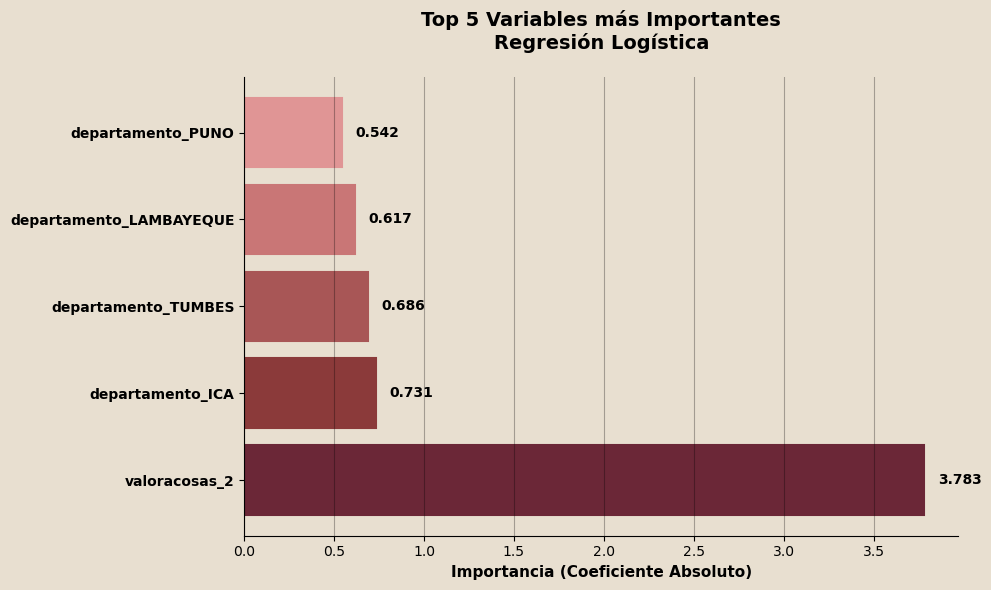


COEFICIENTES DETALLADOS (Top 5)

                Variable  Coeficiente  Importancia (|coef|) Dirección
          valoracosas_2     3.782633              3.782633  Positiva
       departamento_ICA    -0.730810              0.730810  Negativa
    departamento_TUMBES    -0.686420              0.686420  Negativa
departamento_LAMBAYEQUE    -0.616668              0.616668  Negativa
      departamento_PUNO     0.541697              0.541697  Positiva


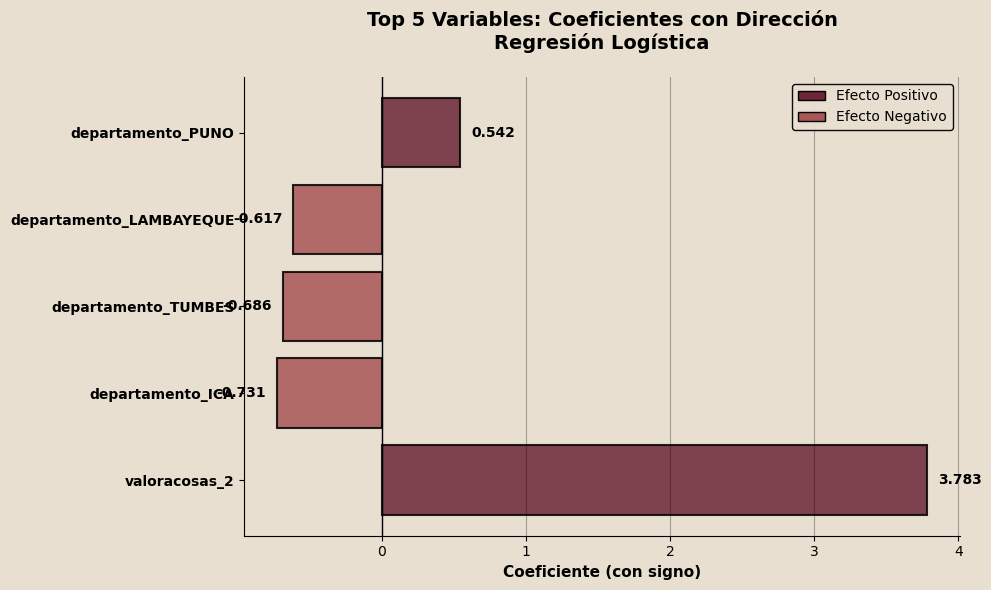

In [61]:
# ============================================================================
# IMPORTANCIA DE VARIABLES - REGRESIÓN LOGÍSTICA
# ============================================================================
print("\n" + "="*70)
print("VARIABLES MÁS IMPORTANTES - REGRESIÓN LOGÍSTICA")
print("="*70)

# Extraer los coeficientes del modelo
coefficients = best_log_reg.coef_[0]

# Crear Serie con nombres de variables y sus coeficientes absolutos
feature_importance_log = pd.Series(
    np.abs(coefficients), 
    index=X_train.columns
).sort_values(ascending=False)

# Mostrar top 5 en consola
print("\nTop 5 Variables más Importantes:")
print(feature_importance_log.head(5))

# Tomar solo el top 5
top_5_log = feature_importance_log.head(5)

# Visualización del Top 5
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

bars = plt.barh(range(len(top_5_log)), top_5_log.values, 
                edgecolor=bordo_dark, linewidth=1.5)

# Colores degradados en bordo
colors_top5 = ['#6B2737', '#8B3A3A', '#A85656', '#C97676', '#E09595']
for i, bar in enumerate(bars):
    bar.set_color(colors_top5[i])

# Añadir valores en las barras
for i, (value, name) in enumerate(zip(top_5_log.values, top_5_log.index)):
    ax.text(value + max(top_5_log.values)*0.02, i, f'{value:.3f}',
            va='center', fontweight='bold', color=text_color, fontsize=10)

plt.yticks(range(len(top_5_log)), top_5_log.index, 
          color=text_color, fontweight='bold', fontsize=10)
plt.xlabel('Importancia (Coeficiente Absoluto)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Top 5 Variables más Importantes\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, color=text_color)
plt.tight_layout()
plt.show()

# También crear tabla comparativa con coeficientes originales (con signo)
print("\n" + "="*70)
print("COEFICIENTES DETALLADOS (Top 5)")
print("="*70)

coefficients_top5 = pd.DataFrame({
    'Variable': top_5_log.index,
    'Coeficiente': [coefficients[list(X_train.columns).index(var)] for var in top_5_log.index],
    'Importancia (|coef|)': top_5_log.values,
    'Dirección': ['Positiva' if coefficients[list(X_train.columns).index(var)] > 0 else 'Negativa' 
                  for var in top_5_log.index]
})

print("\n", coefficients_top5.to_string(index=False))

# Visualización adicional: Coeficientes con signo (positivos/negativos)
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor(bg_color)
ax.set_facecolor(bg_color)

# Obtener coeficientes con signo del top 5
coef_signed = [coefficients[list(X_train.columns).index(var)] for var in top_5_log.index]
colors_signed = [bordo_dark if c > 0 else '#A85656' for c in coef_signed]

bars = plt.barh(range(len(top_5_log)), coef_signed, 
                color=colors_signed, alpha=0.85,
                edgecolor=text_color, linewidth=1.5)

# Añadir valores
for i, value in enumerate(coef_signed):
    offset = max(abs(min(coef_signed)), max(coef_signed)) * 0.02
    x_pos = value + offset if value > 0 else value - offset
    ha = 'left' if value > 0 else 'right'
    ax.text(x_pos, i, f'{value:.3f}',
            va='center', ha=ha, fontweight='bold', color=text_color, fontsize=10)

plt.yticks(range(len(top_5_log)), top_5_log.index, 
          color=text_color, fontweight='bold', fontsize=10)
plt.xlabel('Coeficiente (con signo)', fontsize=11, fontweight='bold', color=text_color)
plt.title('Top 5 Variables: Coeficientes con Dirección\nRegresión Logística', 
          fontsize=14, fontweight='bold', color=text_color, pad=20)
plt.axvline(x=0, color=text_color, linestyle='-', linewidth=1)

# Leyenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=bordo_dark, edgecolor=text_color, label='Efecto Positivo'),
    Patch(facecolor='#A85656', edgecolor=text_color, label='Efecto Negativo')
]
ax.legend(handles=legend_elements, loc='best', framealpha=0.95,
         facecolor=bg_color, edgecolor=text_color)

ax.tick_params(colors=text_color)
for spine in ax.spines.values():
    spine.set_edgecolor(text_color)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='x', alpha=0.3, color=text_color)
plt.tight_layout()
plt.show()